In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import json
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec
from plot import get_model_style, MODEL_FAMILIES
from data import make_metrics_cumulative, filter_runs, pad_to_max_length


In [25]:
full_df = pd.read_pickle("/nfs/staff-ssd/beyer/llm-quick-check/outputs/attack_runs_latest.pkl")

In [26]:
N_PROMPTS = 300
PROMPT_IDX = list(range(N_PROMPTS))
df = full_df[full_df['prompt_idx'] < N_PROMPTS]

In [27]:
# Filter out runs that we care about
model_family = 'mistral'
models = MODEL_FAMILIES[model_family]['ids']
target_df = df[df['model'].isin(models)]

Found 1500 gcg runs


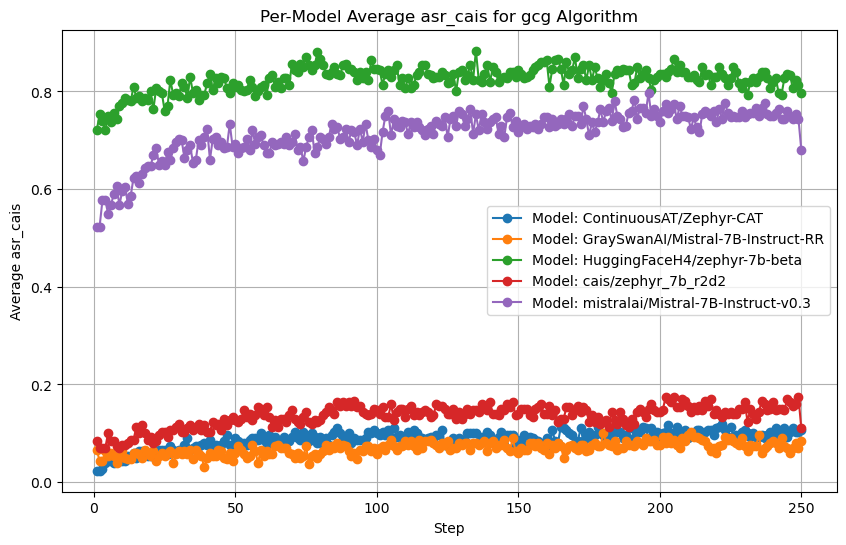

In [ ]:
# Filter the dataframe for the 'pgd' algorithm
algorithm = 'gcg'
metric = 'asr_cais'

attack_df = filter_runs(target_df, algorithm=algorithm, algorithm_params={"placement": "suffix"})

print(f"Found {len(attack_df)} {algorithm} runs")

attack_df = pad_to_max_length(attack_df)
attack_df = make_metrics_cumulative(attack_df)

# Group by model
grouped_models = attack_df.groupby('model')

# Initialize a dictionary to store the average loss for each model
model_avg_metric = {}

# Iterate through each model group
for model, group in grouped_models:
    # Combine all losses across rows for this model
    combined_losses = np.array([item for loss_list in group[metric] for item in loss_list]).reshape(-1, len(group[metric].iloc[0]))
    # Compute the per-point average (average across rows for each of the 100 points)
    mean_per_step = combined_losses.mean(axis=0)
    model_avg_metric[model] = mean_per_step

# Plot the average loss curves for each model
plt.figure(figsize=(10, 6))
for model, avg_loss in model_avg_metric.items():
    plt.plot(range(1, len(avg_loss)+1), avg_loss, linestyle='-', label=f'Model: {model}', **get_model_style(model))

plt.xlabel('Step')
plt.ylabel(f'Average {metric}')
plt.title(f'Per-Model Average {metric} for {algorithm} Algorithm')
plt.legend()
# plt.yscale('log')
plt.grid(True)
plt.show()

Found 1500 gcg runs


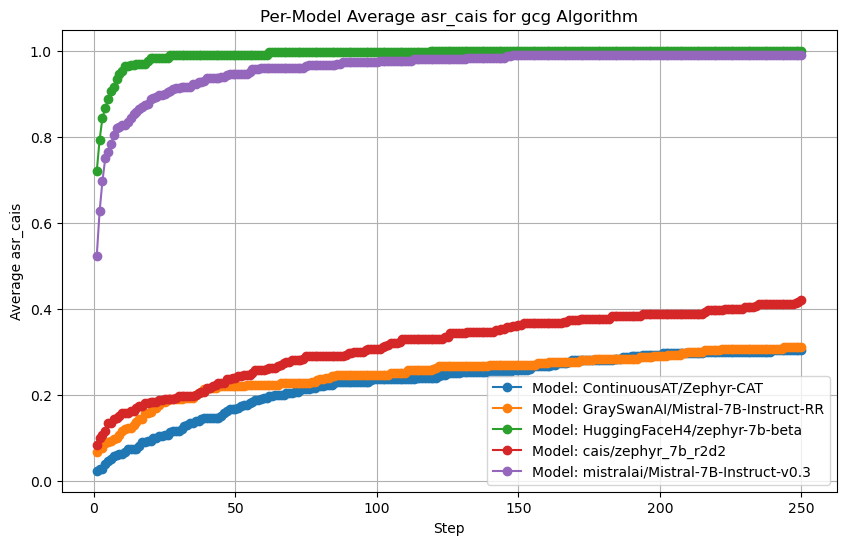

In [30]:
# Filter the dataframe for the 'pgd' algorithm
algorithm = 'gcg'
metric = 'asr_cais'

attack_df = filter_runs(target_df, algorithm=algorithm, algorithm_params={"placement": "suffix"})

print(f"Found {len(attack_df)} {algorithm} runs")

attack_df = pad_to_max_length(attack_df)
attack_df = make_metrics_cumulative(attack_df)

# Group by model
grouped_models = attack_df.groupby('model')

# Initialize a dictionary to store the average loss for each model
model_avg_metric = {}

# Iterate through each model group
for model, group in grouped_models:
    # Combine all losses across rows for this model
    combined_losses = np.array([item for loss_list in group[metric] for item in loss_list]).reshape(-1, len(group[metric].iloc[0]))
    # Compute the per-point average (average across rows for each of the 100 points)
    mean_per_step = combined_losses.mean(axis=0)
    model_avg_metric[model] = mean_per_step

# Plot the average loss curves for each model
plt.figure(figsize=(10, 6))
for model, avg_loss in model_avg_metric.items():
    plt.plot(range(1, len(avg_loss)+1), avg_loss, marker='o', linestyle='-', label=f'Model: {model}')

plt.xlabel('Step')
plt.ylabel(f'Average {metric}')
plt.title(f'Per-Model Average {metric} for {algorithm} Algorithm')
plt.legend()
# plt.yscale('log')
plt.grid(True)
plt.show()